In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Biar dapet type hintnya
import tensorflow as tf
import keras
Dense = keras.layers.Dense
Sequential = keras.models.Sequential
Dense = keras.layers.Dense
Dropout = keras.layers.Dropout
Flatten = keras.layers.Flatten
Conv2D = keras.layers.Conv2D
MaxPooling2D = keras.layers.MaxPooling2D
BatchNormalization = keras.layers.BatchNormalization
to_categorical = keras.utils.to_categorical
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator


import cv2
import os

In [6]:
DAISY_DIR = '../dataset/archive/train/daisy'
DANDELION_DIR = "../dataset/archive/train/dandelion"
ROSE_DIR = "../dataset/archive/train/rose"
SUNFLOWER_DIR = "../dataset/archive/train/sunflower"
TULIP_DIR = "../dataset/archive/train/tulip"
FLOWER_NAMES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
DIR = [DAISY_DIR, DANDELION_DIR, ROSE_DIR, SUNFLOWER_DIR, TULIP_DIR]

In [7]:
def create_training_data(flower_name, flower_dir,img_size):
    X = []
    y = []
    for num,i in enumerate(flower_dir):
        for j in tqdm(os.listdir(i)):
            path = os.path.join(i,j)
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            try:
                img = cv2.resize(img, img_size)
            except:
                continue
                
            X.append(np.array(img))
            y.append(flower_name[num])
    
    return X,y

In [8]:
X,y = create_training_data(FLOWER_NAMES, DIR, (200,200))

100%|██████████| 607/607 [00:05<00:00, 113.48it/s]


In [9]:
def view_random_images(X, y, random_state = 42):
    np.random.seed(random_state)
    plt.figure(figsize = (6,12))    
    
    for i in range(10):
        plt.subplot(5,2,i+1)
        num = np.random.randint(len(X))
        plt.imshow(X[num])
        plt.title(y[num])
    
    plt.tight_layout()

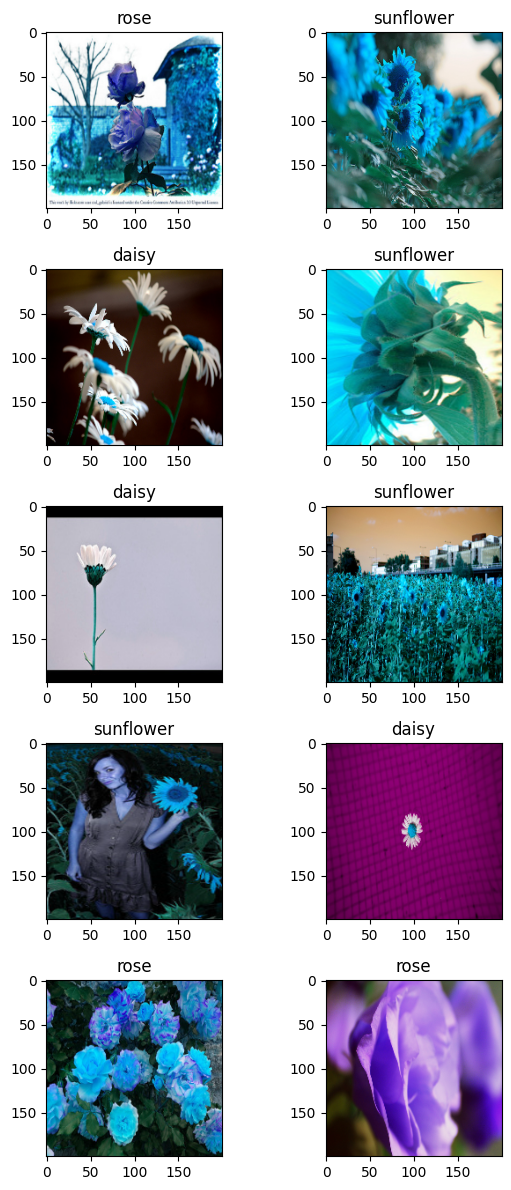

In [10]:
view_random_images(X,y, random_state = 100)

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y,5)

In [12]:
X = (np.array(X))/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [13]:
np.random.seed(42)

In [14]:
cnn = Sequential()
cnn.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (200,200,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(BatchNormalization(axis = 1))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (200,200,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(BatchNormalization(axis = 1))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters = 64, kernel_size = (4,4), padding = 'same', activation = 'relu', input_shape = (200,200,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(BatchNormalization(axis = 1))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (200,200,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(BatchNormalization(axis = 1))
cnn.add(Flatten())
cnn.add(Dropout(0.15))
cnn.add(Dense(512, activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dense(512, activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dense(5, activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

d:\ITB\Semester 6\ML\Prak 2\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 16)   │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 32)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 64)     │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,078,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         2,56

 Total params: 7,450,737 (28.42 MB)

 Trainable params: 7,448,315 (28.41 MB)

 Non-trainable params: 2,422 (9.46 KB)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.16, # Randomly zoom image 
        width_shift_range=0.32,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.32,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(X_train)

In [20]:
batch_size = 100
epochs = 4

train = cnn.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0]//16)


Epoch 1/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 260ms/step - accuracy: 0.6652 - loss: 0.8742 - val_accuracy: 0.4618 - val_loss: 1.5564
Epoch 2/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 262ms/step - accuracy: 0.6620 - loss: 0.8689 - val_accuracy: 0.5509 - val_loss: 1.2369
Epoch 3/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.6666 - loss: 0.8462 - val_accuracy: 0.5327 - val_loss: 1.2500
Epoch 4/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 272ms/step - accuracy: 0.6656 - loss: 0.8314 - val_accuracy: 0.4818 - val_loss: 1.4410


In [32]:
cnn.save_weights('flower_classification_cnn_.weights.h5')


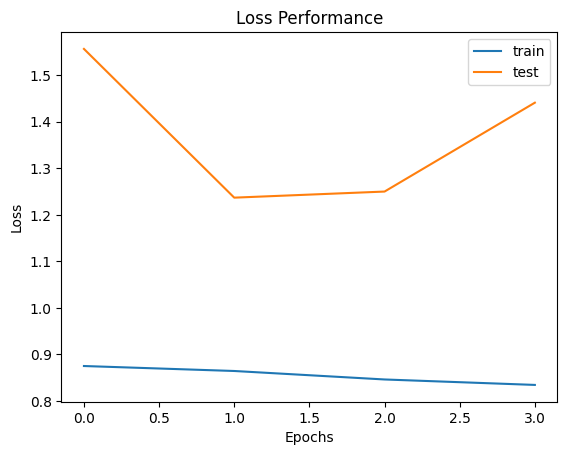

In [33]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Loss Performance')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


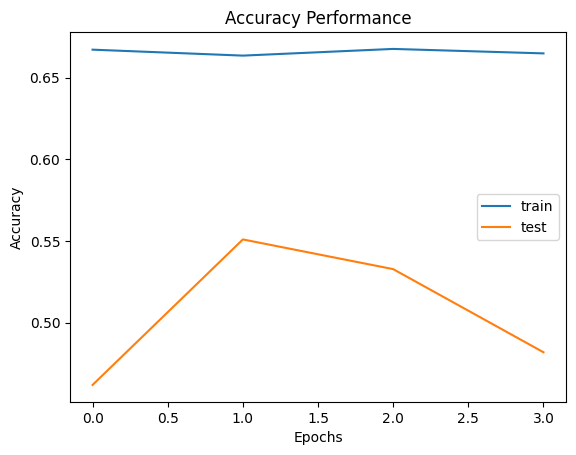

In [47]:
print(train.history.keys())
plt.plot(train.history['accuracy']) # other version might be acc
plt.plot(train.history['val_accuracy']) # other version might be val_acc
plt.title('Accuracy Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [40]:
def create_test_data(path):
    X = []
    for i in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path,i), cv2.IMREAD_COLOR)
        try:
            img = cv2.resize(img, (200,200))
        except:
            continue
        X.append(np.array(img))
    return X

In [43]:
X_test = create_test_data('../dataset/archive/test/')
X_test = (np.array(X_test))/255
X_test = np.array(X_test)

100%|██████████| 924/924 [00:00<00:00, 1077.78it/s]


In [44]:
predictions = cnn.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
predictions = le.inverse_transform(predictions)
predictions = pd.Series(predictions, name = 'Flower')

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [50]:
submission = pd.DataFrame(predictions)
submission['Id'] = submission.index
submission = submission[['Id', 'Flower']]
submission.to_csv('submission.csv', index = False)
submission.head(10)

,Id,Flower
0,0,sunflower
1,1,dandelion
2,2,rose
3,3,dandelion
4,4,dandelion
5,5,dandelion
6,6,dandelion
7,7,dandelion
8,8,sunflower
9,9,sunflower
